<center> <span style="color:#0F3460;font-size:30px; font-weight: bold; padding:250px ;">Poverty Solutions</span> </center>


<span style="color:#0F3460;font-size:21px; font-weight: bold;">1.1 Importing libaries </span> 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 1</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Data Exploration and Preprocessing</span>  </center> 

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Importing My Data From *csv* File</span> 

In [58]:
retail = pd.read_excel('/workspaces/online_retail/online_retail_II.xlsx')
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [38]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [39]:
retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Checking for missing values</span> 

In [40]:
retail.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Removing missing values, duplicates</span> 

In [41]:
clear_retail=retail.dropna()

In [42]:
clear_retail=clear_retail.drop_duplicates()
clear_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Remove negative quantities and prices</span> 

In [43]:
clear_retail = clear_retail[(clear_retail['Quantity'] > 0) & (clear_retail['Price'] > 0)]

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Remove outliers using IQR method</span> 

In [44]:
Q1 = clear_retail[['Quantity', 'Price']].quantile(0.25)
Q3 = clear_retail[['Quantity', 'Price']].quantile(0.75)
IQR = Q3 - Q1

In [45]:
clear_retail = clear_retail[~((clear_retail[['Quantity', 'Price']] < (Q1 - 1.5 * IQR)) | (clear_retail[['Quantity', 'Price']] > (Q3 + 1.5 * IQR))).any(axis=1)]

 <span style="color:green;font-size:19px; font-weight: bold;">Checking: worked(;.. Now it is clean and tidy</span> 

In [46]:
clear_retail.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

 <span style="color:orange;font-size:19px; font-weight: bold;">Focused Features: 'Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country' (all of them)</span> 

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Feature Engineering: Segment Characteristics >  Total Price, Frequency, Recency</span> 

Total Price: TO understand how much each segment spends on average (TotalPrice). This helps identify high-value customers.

In [47]:
clear_retail['TotalPrice'] = clear_retail['Quantity'] * clear_retail['Price']

Frequency: TO learn how often each segment makes purchases (Frequency). Frequent buyers might be more loyal and worth focusing on.

In [48]:
customer_frequency = clear_retail.groupby('Customer ID').size().reset_index(name='Frequency')
clear_retail = clear_retail.merge(customer_frequency, on='Customer ID', how='left')

Recency: TO determine how recently each segment has made a purchase (Recency). Segments with recent purchases might be more engaged and responsive to marketing efforts.

In [49]:
clear_retail['InvoiceDate'] = pd.to_datetime(clear_retail['InvoiceDate']) #convert to datetime
max_date = clear_retail['InvoiceDate'].max()
clear_retail['Recency'] = (max_date - clear_retail['InvoiceDate']).dt.days

<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 2</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Data Visualization</span>  </center> 

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Top Products</span> 

In [50]:
top_products = clear_retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

print("Top Products by Quantity Sold:\n", top_products)

Top Products by Quantity Sold:
 Description
WHITE HANGING HEART T-LIGHT HOLDER    17305
PACK OF 72 RETRO SPOT CAKE CASES      16913
60 TEATIME FAIRY CAKE CASES           15035
ASSORTED COLOUR BIRD ORNAMENT         13175
PACK OF 60 PINK PAISLEY CAKE CASES    12222
STRAWBERRY CERAMIC TRINKET BOX        12166
HANGING HEART ZINC T-LIGHT HOLDER      8677
PACK OF 72 SKULL CAKE CASES            8579
LUNCH BAG RED SPOTTY                   8545
ZINC METAL HEART DECORATION            8131
Name: Quantity, dtype: int64


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Number of Transactions Per Month</span> 

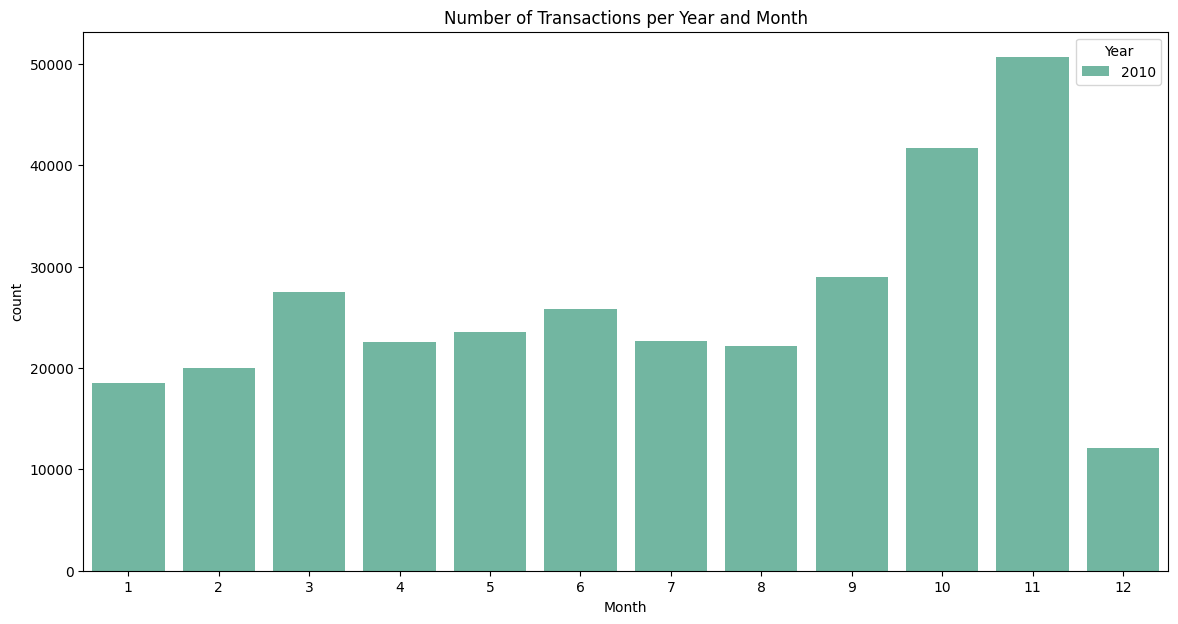

In [57]:
plt.figure(figsize=(14, 7))
sns.countplot(data=filtered_retail, x='Month', hue='Year', palette='Set2')
plt.title('Number of Transactions per Year and Month')
plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Quantity, price, total price</span> 

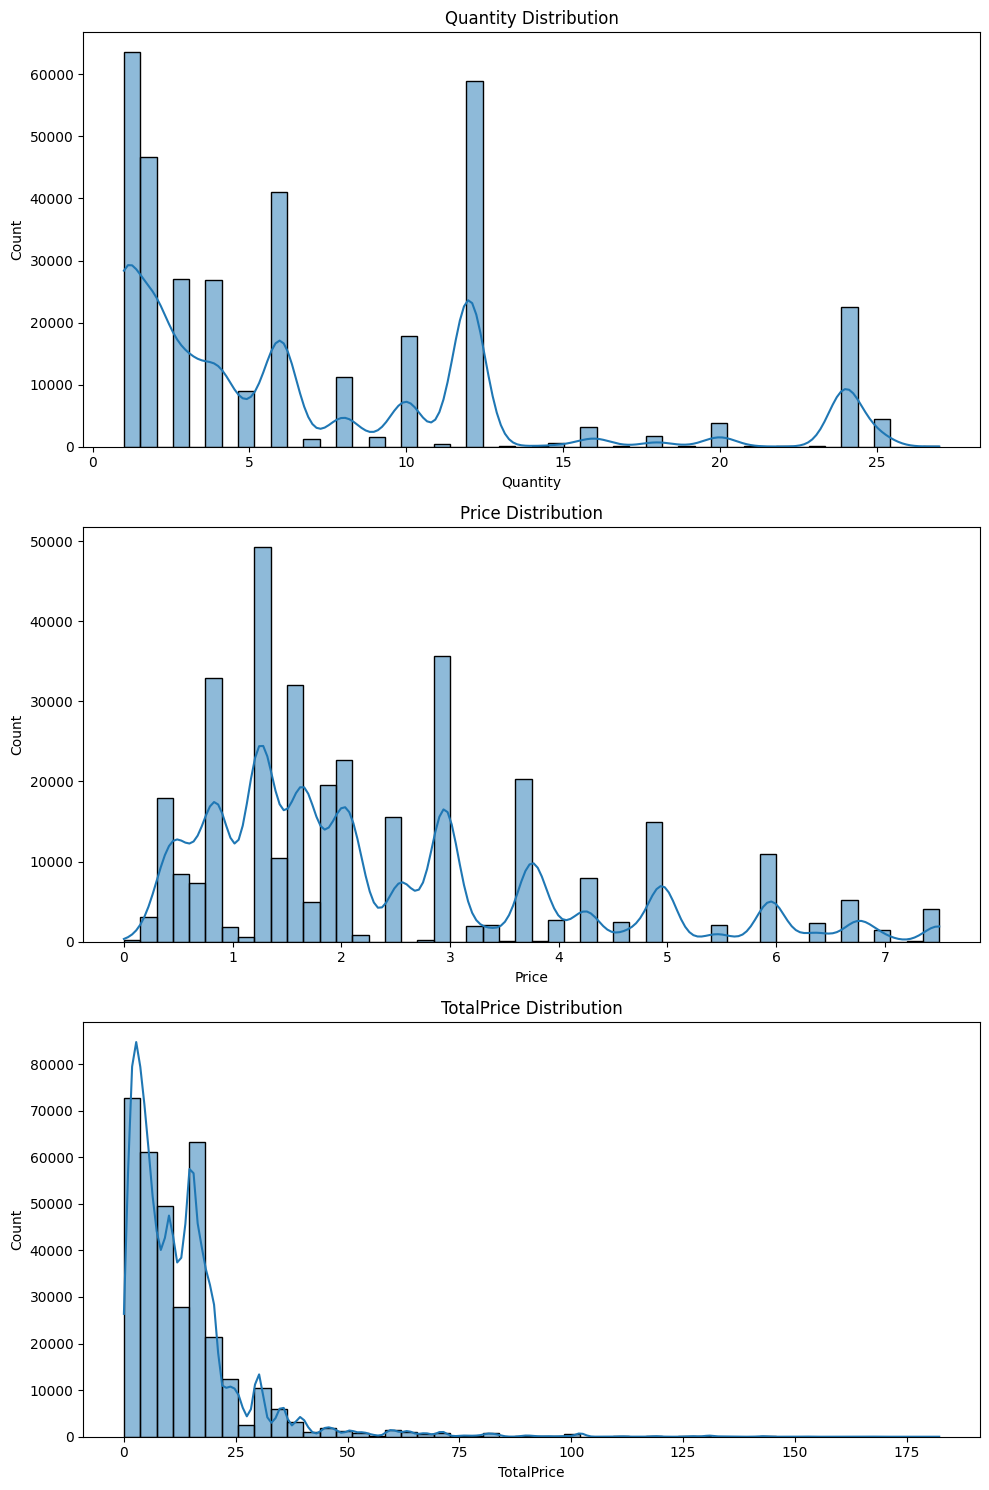

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(clear_retail['Quantity'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Quantity Distribution')

sns.histplot(clear_retail['Price'], bins=50, kde=True, ax=axs[1])
axs[1].set_title('Price Distribution')

sns.histplot(clear_retail['TotalPrice'], bins=50, kde=True, ax=axs[2])
axs[2].set_title('TotalPrice Distribution')

plt.tight_layout()
plt.show()


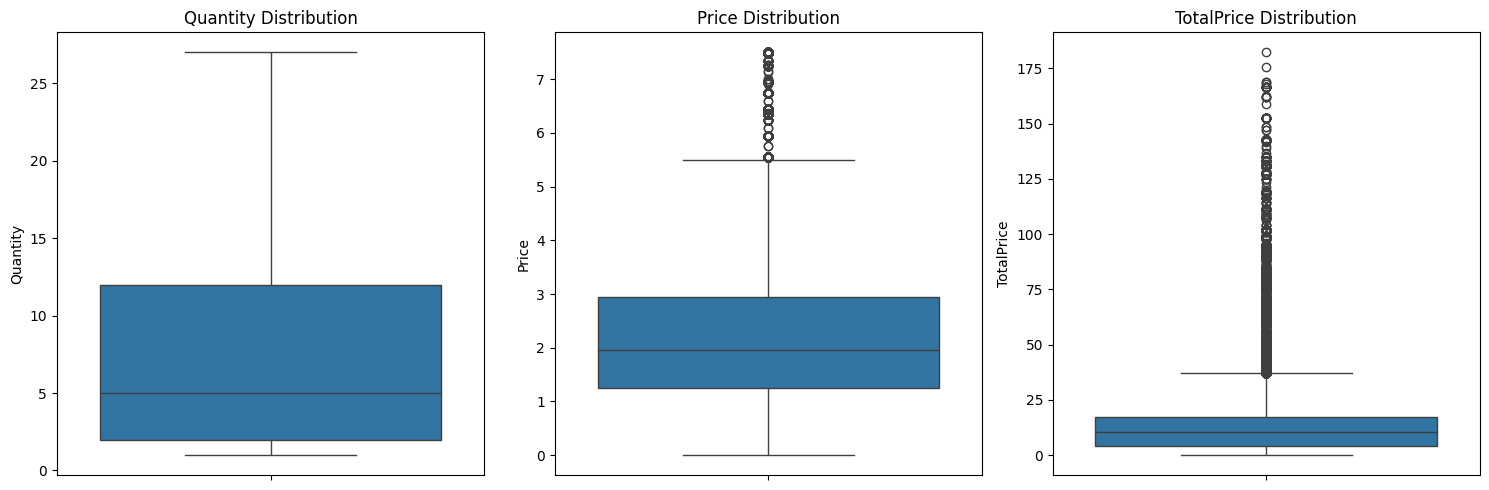

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=clear_retail['Quantity'], ax=axs[0])
axs[0].set_title('Quantity Distribution')

sns.boxplot(y=clear_retail['Price'], ax=axs[1])
axs[1].set_title('Price Distribution')

sns.boxplot(y=clear_retail['TotalPrice'], ax=axs[2])
axs[2].set_title('TotalPrice Distribution')

plt.tight_layout()
plt.show()


<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 2</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Customer Segmentation</span>  </center> 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Selecting features for segmentation</span> 


In [ ]:
segmentation_features = clear_retail[['Quantity', 'Price', 'TotalPrice', 'Frequency', 'Recency']]

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Scaling the data</span> 


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_features)

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">K-Means clustering</span> 


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clear_retail['Segment'] = kmeans.fit_predict(scaled_features)

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Visualizing</span> 


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

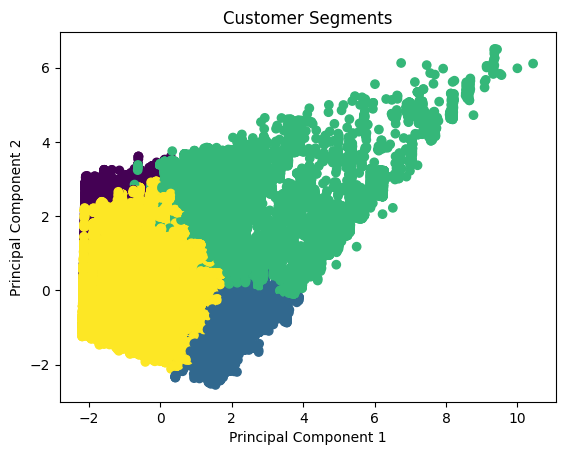

In [ ]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clear_retail['Segment'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments')

plt.show()


- Purple (Segment 0): Low spend, moderate frequency, moderate recency
- Yellow (Segment 1): Moderate spend, high frequency, low recency
- Green (Segment 2): High spend, high frequency, very low recency
- Blue (Segment 3): Very high spend, very high frequency, extremely low recency

In [ ]:
segment_description = clear_retail.groupby('Segment').agg({
    'Quantity': ['mean', 'median', 'min', 'max'],
    'Price': ['mean', 'median', 'min', 'max'],
    'TotalPrice': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Recency': ['mean', 'median', 'min', 'max']
})
print(segment_description)

          Quantity                    Price                     TotalPrice  \
              mean median min max      mean median    min   max       mean   
Segment                                                                      
0         4.944662    4.0   1  16  2.669890   2.10  0.001  7.50  10.283941   
1        22.735194   24.0  12  27  0.928441   0.85  0.060  2.55  20.486715   
2        13.721655   12.0   4  27  4.518296   4.25  2.100  7.50  56.181212   
3         5.441127    4.0   1  16  2.159957   1.65  0.001  7.50   9.687184   

                                 Frequency                      Recency  \
        median     min     max        mean median min   max        mean   
Segment                                                                   
0         8.85   0.001   39.60  561.125220  210.0   1  4588  269.390187   
1        18.00   1.200   50.70  345.842328  133.0   1  4588  162.085854   
2        50.40  27.000  182.25  380.067517  128.0   1  4588  163.503111   
3  

In [ ]:
segment_counts = clear_retail['Segment'].value_counts()
print(segment_counts)


Segment
3    160643
0    134356
1     31204
2     16070
Name: count, dtype: int64
